# Questão A
Desenvolvida no notebook

# Questão B

As diferentes cores nas bolhas do gráfico representam os diferentes continentes:

Ásia, Europa, África, Américas e Oceânia

Foi usado para definir as cores diferentes de cada continente:

- para agrupar os diferentes continentes em categorias, e codificá-los  através de um valor numérico - data['continent']=pd.Categorical(data['continent'])

- para definir a cor ("c") de cada continente consoante o código de categoria definido anteriormente - c=tmp['continent'].cat.codes 

- para atribuir um mapa de cores aos continentes foi usado o codigo ("cmap"), para transparência das bolhas ("alpha"), e para o contorno branco ("edgecolors") - cmap="Accent", alpha=0.6, edgecolors="white"¶


In [52]:
# Para a realizção do grafico é necessario importar as bibliotecas associadas com import
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [53]:
# É "chamado" o CSV com os dados a analizar. O ficheiro encontra-se na Web pelo que usa-se url para anexar o endereço e depois o codigo para chamar os dados
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [54]:
#Usando .Categorical() da biblioteca Pandas, agrupa-se os diferentes continentes, dando a cada um uma categoria em forma de valor numérico

data['continent']=pd.Categorical(data['continent'])
data['continent'].unique()

[Asia, Europe, Africa, Americas, Oceania]
Categories (5, object): [Asia, Europe, Africa, Americas, Oceania]

<IPython.core.display.Javascript object>


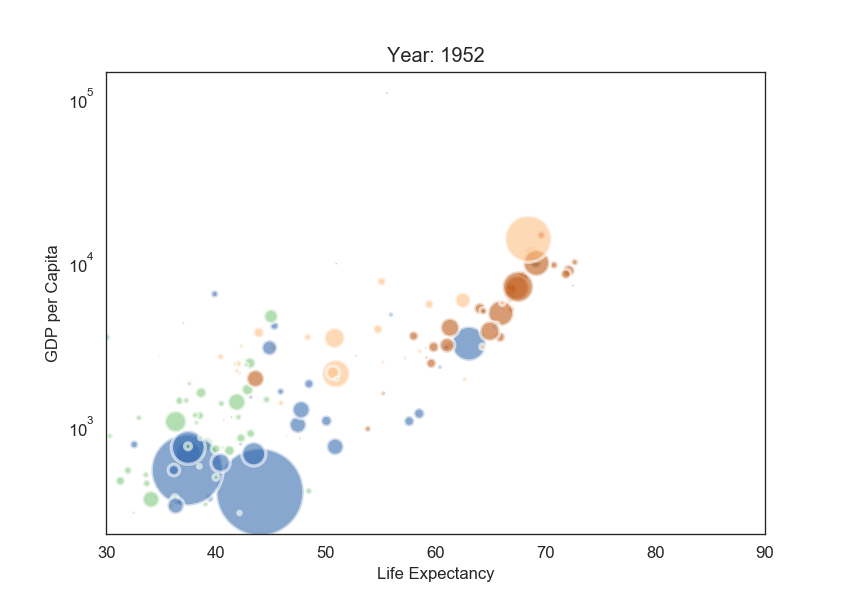

<IPython.core.display.Javascript object>


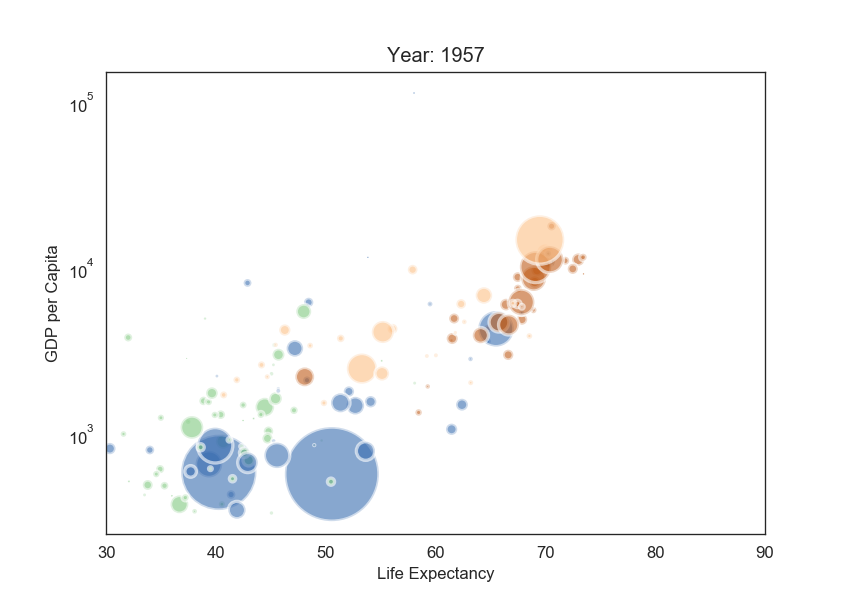

<IPython.core.display.Javascript object>


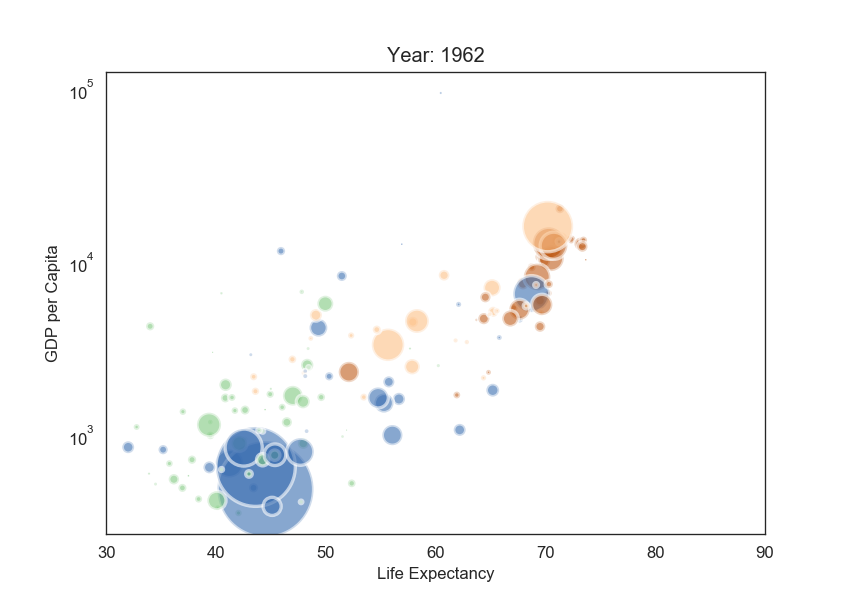

<IPython.core.display.Javascript object>


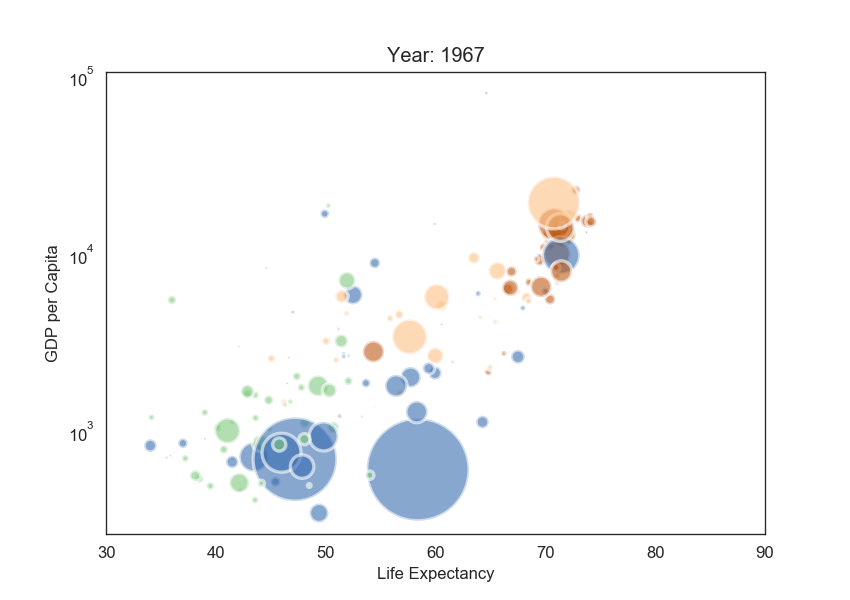

<IPython.core.display.Javascript object>


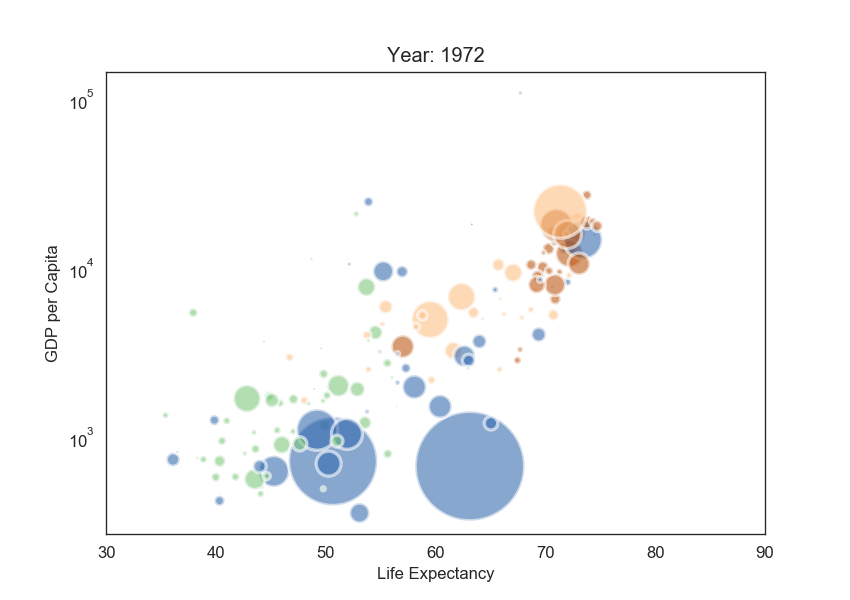

<IPython.core.display.Javascript object>


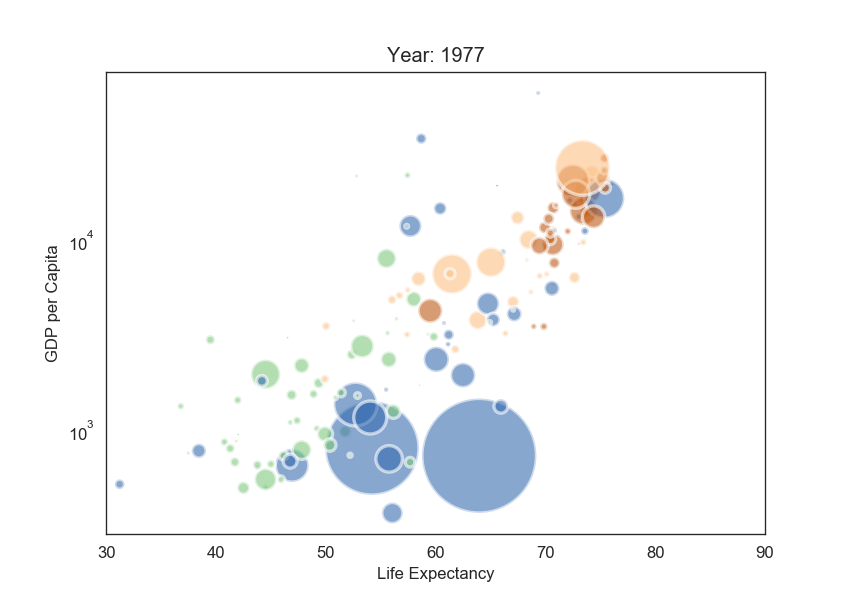

<IPython.core.display.Javascript object>


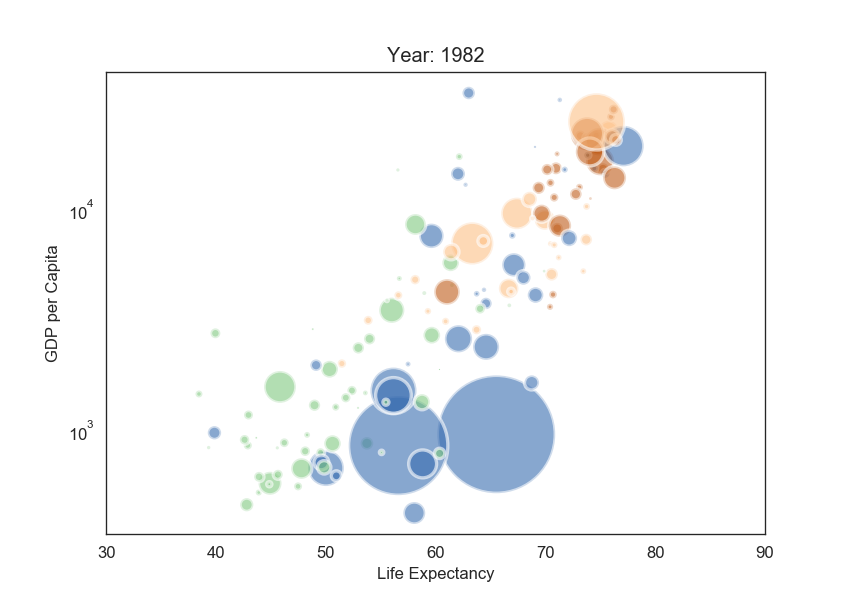

<IPython.core.display.Javascript object>


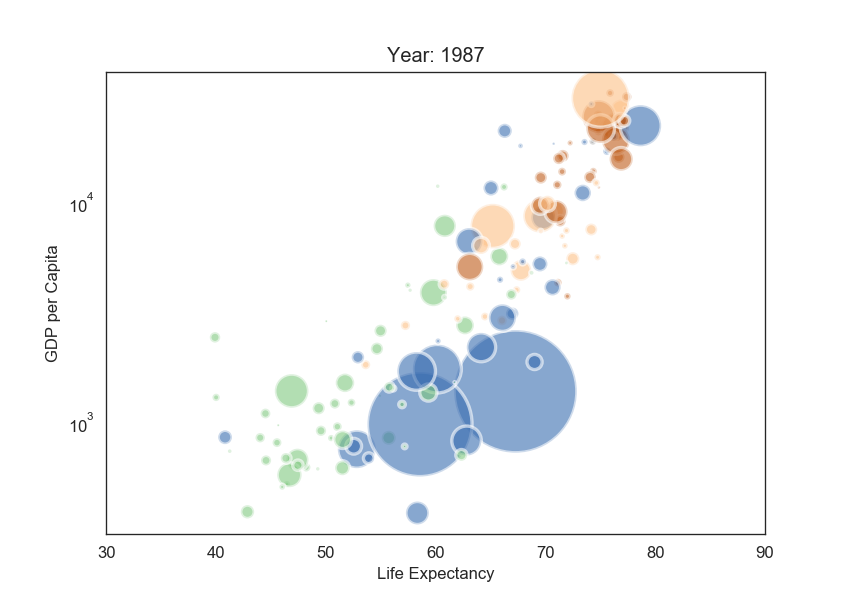

<IPython.core.display.Javascript object>


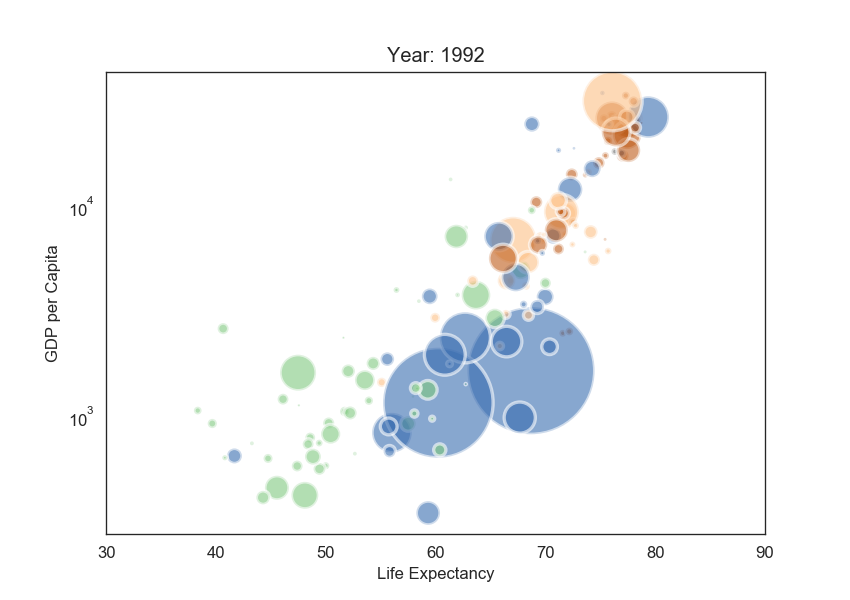

<IPython.core.display.Javascript object>


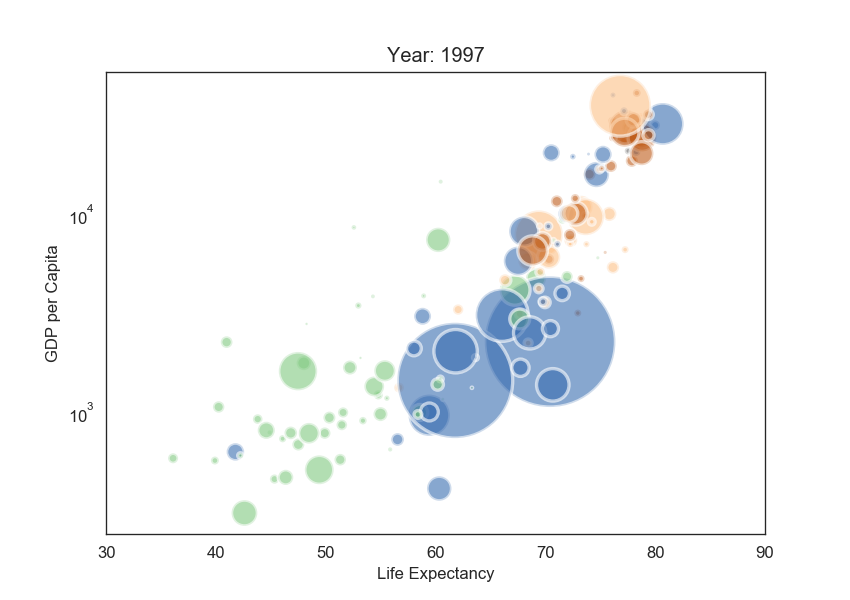

<IPython.core.display.Javascript object>


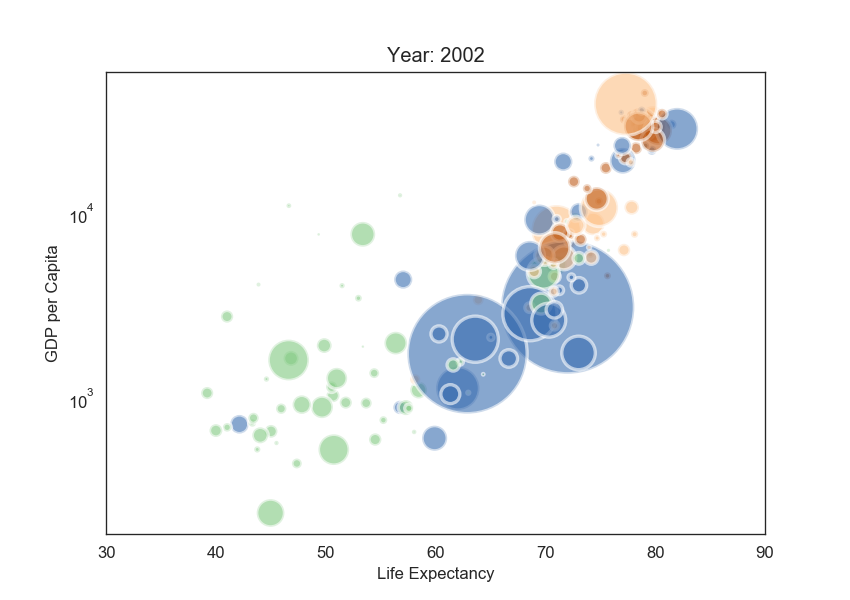

<IPython.core.display.Javascript object>


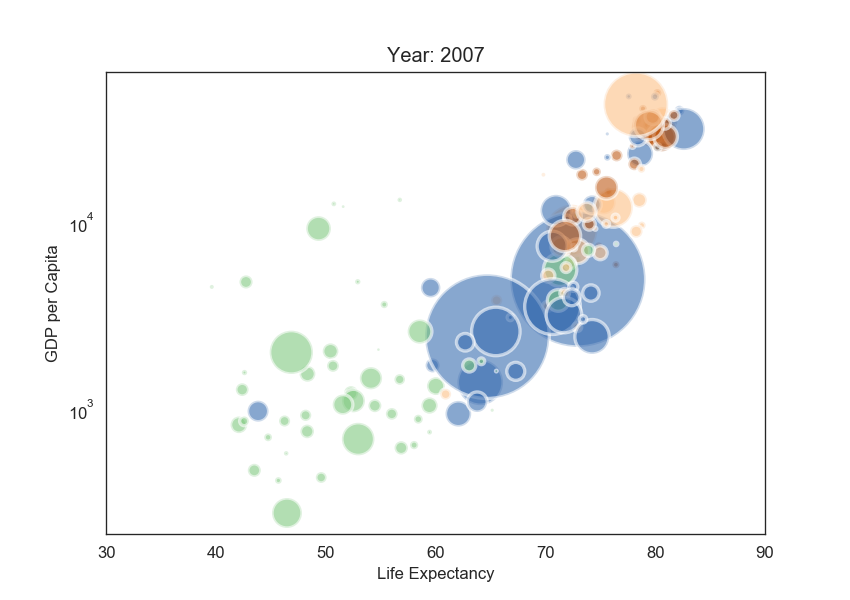

In [60]:
# Para criar gráficos interativos, chamamos a biblioteca  %matplotlib notebook
%matplotlib notebook

# Define-se valor unico para cada ano [year] dos dados:
for i in data.year.unique():
    
# Inicializa-se a figura, usando .figure() e definindo o tamanho da mesma com figsize

    fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
 
 
#Cria-se um gráfico de dispersão usando ("scatter") para cada ano e definindo a variavel em (tmp) 
# Define-se os eixos x: tmp['lifeExp'] -> Esperança Média de Vida e y: tmp['gdpPercap'] -> PIB per capita
# no parâmetro s, definimos a área da bolha consoante o tamanho populacional e depois definem-se as cores, opacidade, contornos e estilos de linha do gráfico
    tmp=data[ data.year == i ]
    scatter = plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
 #Adiciona-se os dados do gráfico como títulos e limites  
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.xlim(30, 90)
    
     
 # Para salvar as diferentes figuras que irão servir de frames para o gif animado
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

# Transformar os frames em gif, utilizando o software ImageMagick

# Usar o ImageMagick, através do interpretador de comandos Bash, com o seguinte comando
#magick convert -delay 80 Gapminder*.png animated_gapminder.gif